# Multithreaded Algorithm

  **_We all know many serial algorithms that are suitable for running on a uniprocessor computer.But what about multiprocessor computer? In this article we will get through <b>parallel algorithms</b>._**

### Introduction
<b>Multithreading</b> is an important topic for modern computing. Parallel machines are getting cheaper and in fact are now ubiquitous.For instance :
> * <b>supercomputers:</b> custom architectures and networks
> * <b>computer clusters</b> with dedicated networks (distributed memory)
> * <b>multi-core integrated circuit chips</b> (shared memory)
> * <b>GPUs </b>(graphics processing units) with multiple processors

This article emphesise on parallel algorithms, that is,<b> multithreading a single algorithm</b> so that some of its instructions may be executed simultaneously. Parallelism can also be applied to scheduling and managing multiple algorithms, each running concurrently in their own thread and possibly sharing resources.

There are two important concepts in multithreading:**_Static and Dynamic_**
### Static and Dynamic Multithreading

**_Static multithreading_** provides the programmer with an abstraction of virtual processors that are managed explicitly. It's "static" because the programmer must specify in advance how many processors to use at each point which is difficult and inflexible to evolving conditions.

**_Dynamic multithreading_** allows programmers to specify parallelism in applications without worrying about communication
protocols, load balancing, and other vagaries of static-thread programming.Rather than managing threads explicitly, our model is dynamic multithreading in which has the opportunities to use <b>concurrency</b> platform which manages the decisions of mapping these opportunities to actual static threads.This concept is still envolving but it supports two features: **_nested parallelism and parallel loops._**

<b>Nested parallelism</b> allows a subroutine to be “spawned”, allowing the caller to proceed while the spawned subroutine is computing its result. <b>A parallel loop </b> is like an ordinary for loop, except that the iterations of the loop can execute concurrently.

### Concurrency Constructs:
We will use three keywords in our pseudocode:
> * <b>Parallel: </b>add to loop construct such as for to indicate each iteration can be executed in parallel.
> * <b>Spawn: </b>create a parallel sub process, then keep executing the current process (parallel procedure call).
> * <b>Sync: </b>wait here until all active parallel threads created by this instance of the program finish; used when one cannot proceed without pending results.

The parallel and spawn keywords do not force parallelism: they just says that it is <b>permissible</b>. This is **logical parallelism**. A scheduler will make the **decision**.


### Example: Parallel Fibonacci
For illustration, we use **_Fibonacci_** algorithm and make it parallel. Here is the definition of Fibonacci numbers:
>  1. F0 = 0 
>  1. F1 = 1
>  1. Fi = Fi-1 + Fi-2, for i > 1

Here is a recursive non-parallel algorithm for computing Fibonacci numbers modeled, along with its recursion tree:

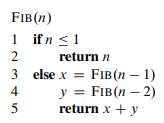


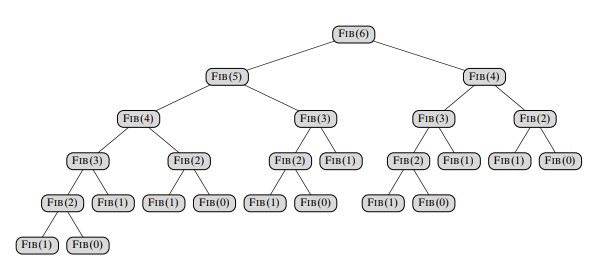

T(n) = T(n − 1) + T(n − 2) + Θ(1)

Since this is an **_exponential growth_**, this is a particularly bad way to calculate Fibonacci numbers

### How would you calculate the Fibonacci numbers?

We will model a multithreaded computation ny using computation **DAG (directed acyclic graph)** G = (V, E).

### What is DAG(Directed Acyclic Graphs)?

In any **digraph**, we define a vertex "v" to be a source, if there are no edges leading into v, and a sink if there are no edges leading out of v. A directed acyclic graph (or DAG) is a digraph that has no cycles.
 

We will model a multithreaded computation as we can see below:

> * **Vertices** in V represent instructions. To simplify the graph, each vertex can represent a strand    
> * **Edges** in E represent dependencies between instructions or strands: (u, v) ∈ E means u must execute before v.    
> * If **G** has a directed path from u to v they are logically in series; otherwise they are logically parallel. 
    
    
    
### Visualizing the Model
    
 The model can be visualized like below for the computation DAG for P-Fib(4):
    


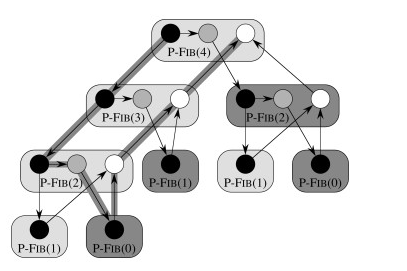

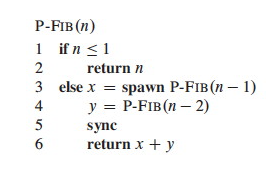

**black indicates that the strand is for lines 1-3; grey for line 4; and white for lines 5-6**

### Edges Categorization :

> * <b> Call Edges </b>point downwards, state that u called v as a normal call. In this example they come out of the **grey circles**.
> * <b> Spawn Edges </b>Edges (u, v) also point downwards, state that u spawned v in parallel. In this example they come out of the **black circles**.
> * <b> Return edges </b>point upwards after returning from a normal call, or after parallel spawning at a **sync** point.They return to the white circles.


### Analysis

For example, we already noted previously that the work of P-Fib(n) is:

T(n) = T(n − 1) + T(n − 2)+ Θ(1)

### Analyzing Spawn

If a group of subcomputations (vertices) are in series, the spawn is the sum of the spawns of the subcomputations. This is like normal sequential analysis.

If a set of subcomputations (vertices) are in parallel, the spawn is the maximum of the spawns of the computations.Then this is parallel one.



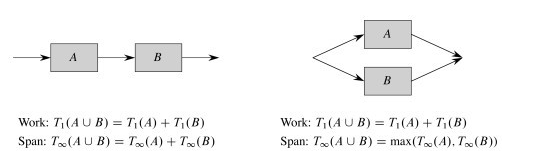

Returning to our example, the spawn of the parallel recursive calls of P-Fib(n) is computed by taking the max rather than the sum:

**T∞ (n) =  max(T∞(n−1), T∞ (n−2)) + Θ(1)  =  T∞(n−1) + Θ(1).**


The recurrence T∞ (n) = T∞(n−1) + Θ(1) has solution Θ(n). So the spawn of P-Fib(n) is Θ(n).
We can now compute the parallelism of P-Fib(n) in general by dividing its Θ(Fn) by its span Θ(n):

**T1(n) / T∞   =   Θ(Fn) / Θ(n)   =   Θ(Fn/n)**

This grows dramatically, as Fn grows much faster than n.

### Implementing Parallel Loops

It is not realistic to think that all the subcomputations in these loops can be spawned  without any extra work.How might this parallel spawning be done, and how does this affect the analysis?

Parallel for spawning can be done by a compiler with a **divide and conquer** approach, itself implemented with parallelism!
Consider how to implement parallelism in lines 5-7 of Mat-Vec above. The concurrency platform compiler can arrange for the procedure shown below to be called instead, Mat-Vec-Main-Loop(A, x, y, n, 1, n). Lines 2 and 3 below are the lines originally within the loop:


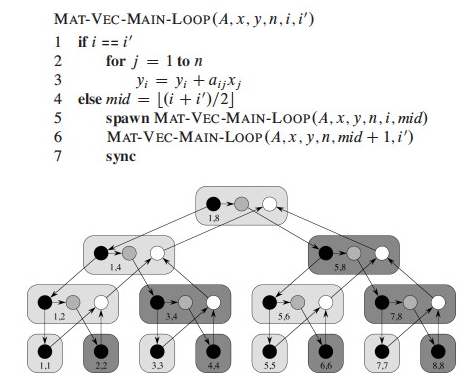

The computation DAG is also shown. It appears that a lot of work is being done to spawn the n leaf node computations, but the increase is not asymptotically significant and The work of Mat-Vec is **T1(n) = Θ(n2)** due to the nested loops in 5-7
Since the computation DAG is a full binary tree, the number of internal nodes is 1 fewer than the n leaf nodes,so this extra work is **Θ(n)**
Each leaf node corresponds to one iteration of loop, and the extra work of recursive spawning can be amortized across the work of the iterations, so that it contributes only constant work.

Concurrency platforms sometimes coarsen the recursion tree by executing several iterations in each leaf, reducing the amount of recursive spawning

The span is increased by **Θ(lg n)** due to the addition of the recursion tree for Mat-Vec-Main-Loop, which is of height
**Θ(lg n)**. In some cases , this increase is washed out by other dominating factors 

### Nested Parallelism

Continuing with our example, the spawn is Θ(n) because even with full utilization of parallelism the inner for loop still requires Θ(n). Since the work is Θ(n2) the parallelism is Θ(n2)/Θ(n) = Θ(n). **Can we improve on this?**:)





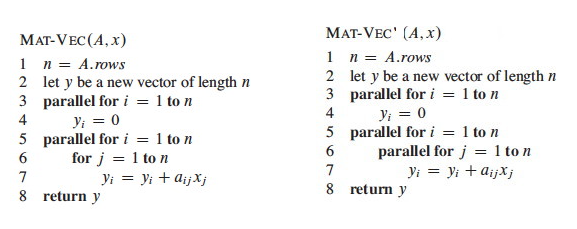

### Race Conditions

Deterministic algorithms do the same thing on the same input; while nondeterministic algorithms may give different results on different runs.
The above Mat-Vec' algorithm is subject to a **potential problem** called a **determinancy race**: when the outcome of a computation could be nondeterministic. In general, **this can only happen when two logically parallel computations access the same memory and one performs a write**.

###### For example  
the code shown below might output 1 or 2 depending on the order in which access to x is interleaved by the two threads:


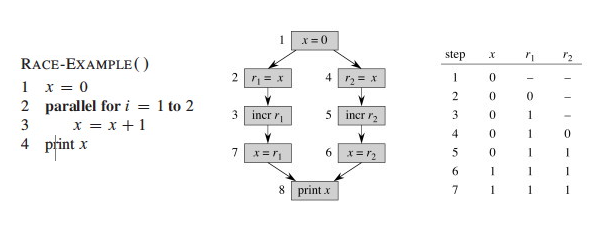

The value of x must first be read into a register r before it is operated on. In this case, there are two registers. It is incremented in the register and then written back out to memory. The table indicates one possible computation sequence that gives the unexpected result.

look at our matrix-vector example again:

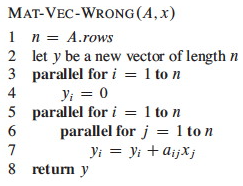

## Examples: 

### Matrix Multiplication
Here is an algorithm for multithreaded matrix multiplication, based on the T1(n) = Θ(n3) algorithm:


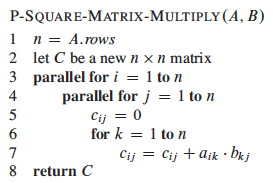
The span of this algorithm is  **T∞(n)   =   Θ(n)**, due to the path for spawning the outer and inner parallel loop executions and then the n executions of the innermost for loop. So the parallelism is 
**T1(n) / T∞(n)   =   Θ(n3) / Θ(n)   =   Θ(n2)**

#### Multithreading a divide and conquer algorithm

Here is a parallel version of the divide and conquer algorithm:


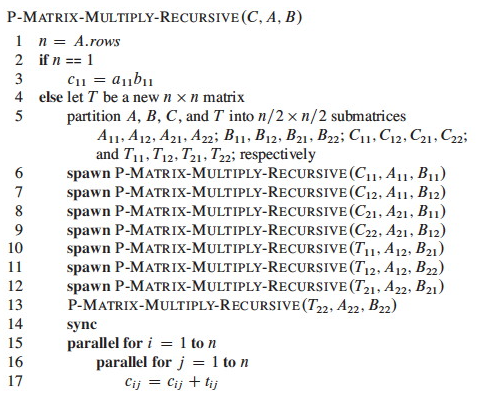



### Resource:
chapter 27
 of **CLRS**=)